In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

51.82579308307018 99.69038516433562
-2.387806605558538 -36.860703126641994
-5.569894623090335 -128.52954369168458
-55.63291927749467 50.02642386108573
2.775419597045641 -104.96669714926892
-27.66610504135584 -9.503263908365028
-15.57776306131359 98.3518906765488
-6.650393264651498 -37.1381406426911
-55.63248534686307 120.03302374420844
-7.270630850727258 136.50202073818616
58.930416174856276 -132.74377861789836
-1.6308812565342805 -5.061686621927862
-34.1229302927461 -121.26531047820342
88.86850572504704 22.80321286509934
-8.226595926013971 -178.60091874638567
6.431194362837175 -4.657487690033065
87.0679870652466 -0.9444733395518199
47.72660826785 143.4552006764278
66.9124655992851 26.079882337502852
-67.49297497051278 -32.8815415990521
-82.93850822495364 33.68623387025289
-81.19333747733725 16.95565141930217
52.965031401463136 -173.0989865859452
-14.008611849107098 172.79098333320871
22.272399170382172 133.38585718156548
-10.683826491179673 140.09589220734995
-16.58771427146408 109.87

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
#import the time library and the datetime module from the datetime library

import time
from datetime import datetime
#import the API key
#import requests

import requests

#import the API key

from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#create an empty list to hold the weather data

city_data=[]

#print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | orlik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | aquiraz
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | atuona
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | acapulco
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | jamestown
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | labuhan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processi

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | alofi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | new norfolk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | whitehorse
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | geraldton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | bethel
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | amderma
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | tkvarcheli
City not found. Skipping...
-------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | tessalit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | prata
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | brisbane
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | yellowknife
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | college
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | hilo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | boueni
-----------------------------
Data Retrieval Complete      
-----------------------------


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | rawatsar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | tiznit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | phu ly
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | lodja
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | santa rosa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | shache
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 4 | lorengau
-----------------------------
Data Retrieval Complete      
-----------------------------


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | linchuan
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | lasem
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | praia da vitoria
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | sentyabrskiy
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | codrington
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | beisfjord
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 6 | zhangjiakou
------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | butajira
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | sibolga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | athabasca
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | sembakung
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | tokur
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | mareeba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | camopi
-----------------------------
Data Retrieval Complete      
----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | mlonggo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | boguchany
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | nabire
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | ornskoldsvik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | luckenwalde
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | karkaralinsk
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | eupen
-----------------------------
Data Retrieval Comp

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 9 | tuscaloosa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | northam
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | toppenish
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | nalut
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | filingue
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | bathsheba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | sakaiminato
-----------------------------
Data Retrieval Complete      
--------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 10 | touros
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | umm lajj
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | shadegan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | kendari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | saleaula
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | sorong
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | gambo
-----------------------------
Data Retrieval Complete      

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12 | santa isabel do rio negro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | erzin
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | mahebourg
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | moerai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | vestmanna
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | puerto cabezas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | inirida
-----------------------------
Data Retrieval Complete     

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 13 | bestobe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 13 | avila
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Orlik,52.5178,99.8250,-11.54,95,90,2.71,RU,2022-12-20 17:10:48
1,Aquiraz,-3.9014,-38.3911,87.89,56,63,13.18,BR,2022-12-20 17:10:48
2,Atuona,-9.8000,-139.0333,78.35,79,69,21.30,PF,2022-12-20 17:08:46
3,Acapulco,16.8634,-99.8901,84.02,51,75,4.61,MX,2022-12-20 17:08:08
4,Jamestown,42.0970,-79.2353,31.01,59,100,3.44,US,2022-12-20 17:10:48
5,Labuhan,-6.8844,112.2051,78.91,83,100,1.48,ID,2022-12-20 17:10:49
6,Caico,-6.4583,-37.0978,95.43,25,1,2.19,BR,2022-12-20 17:10:49
7,Albany,42.6001,-73.9662,32.34,68,10,3.00,US,2022-12-20 17:10:49
8,Merauke,-8.4667,140.3333,78.26,88,100,6.33,ID,2022-12-20 17:10:50
9,Juneau,58.3019,-134.4197,8.60,40,75,5.75,US,2022-12-20 17:08:35


In [51]:
#create new column order
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]

city_data_df.head(14)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Orlik,RU,2022-12-20 17:10:48,52.5178,99.8250,-11.54,95,90,2.71
1,Aquiraz,BR,2022-12-20 17:10:48,-3.9014,-38.3911,87.89,56,63,13.18
2,Atuona,PF,2022-12-20 17:08:46,-9.8000,-139.0333,78.35,79,69,21.30
3,Acapulco,MX,2022-12-20 17:08:08,16.8634,-99.8901,84.02,51,75,4.61
4,Jamestown,US,2022-12-20 17:10:48,42.0970,-79.2353,31.01,59,100,3.44
5,Labuhan,ID,2022-12-20 17:10:49,-6.8844,112.2051,78.91,83,100,1.48
6,Caico,BR,2022-12-20 17:10:49,-6.4583,-37.0978,95.43,25,1,2.19
7,Albany,US,2022-12-20 17:10:49,42.6001,-73.9662,32.34,68,10,3.00
8,Merauke,ID,2022-12-20 17:10:50,-8.4667,140.3333,78.26,88,100,6.33
9,Juneau,US,2022-12-20 17:08:35,58.3019,-134.4197,8.60,40,75,5.75


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
#extract relevant fields for from the dataframe
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]


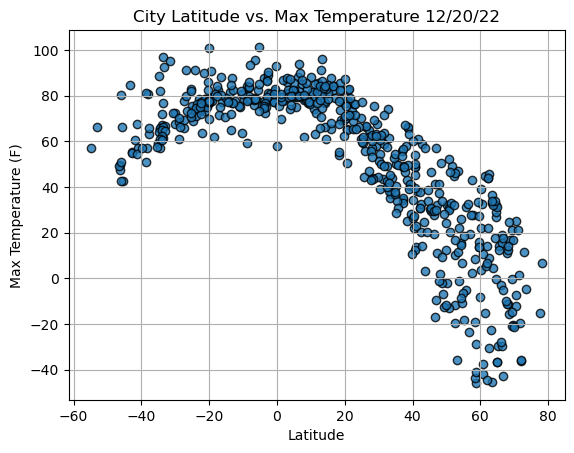

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

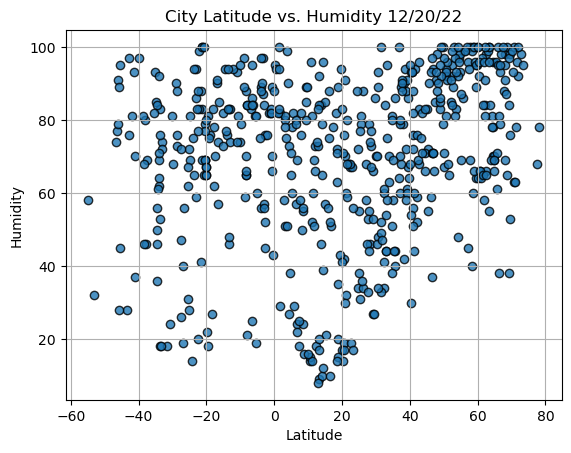

In [44]:
#plot latitude vs Humidity

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# save fig

plt.savefig("weather_data/Fig2.png")

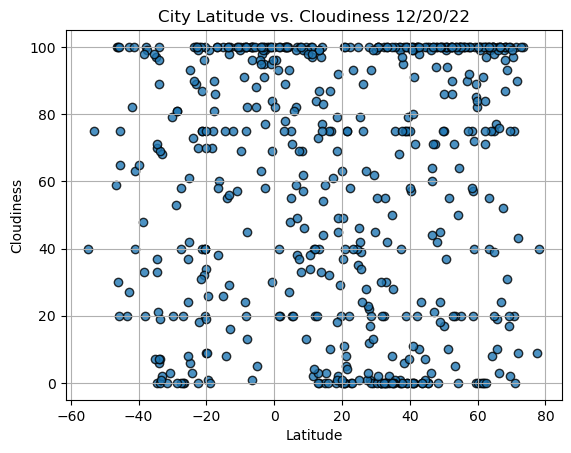

In [45]:
#plt latitude vs cloudiness

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save figure

plt.savefig("weather_data/Fig3.png")

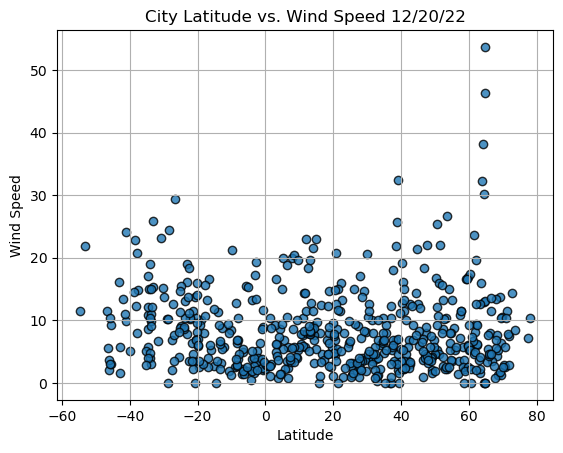

In [46]:
# plot latitude vs wind speed
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save fig

plt.savefig("weather_data/Fig4.png")

In [69]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [49]:
index13 = city_data_df.loc[13]

index13

City                     Dimbokro
Country                        CI
Date          2022-12-20 17:10:51
Lat                        6.6451
Lng                       -4.7048
Max Temp                    93.85
Humidity                       24
Cloudiness                     38
Wind Speed                   2.35
Name: 13, dtype: object

In [54]:
#filter data to find all latitude >= 0

city_data_df["Lat"] >= 0

#to return DataFrame with all data use .loc["the criteria we want"]

city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Orlik,RU,2022-12-20 17:10:48,52.5178,99.8250,-11.54,95,90,2.71
3,Acapulco,MX,2022-12-20 17:08:08,16.8634,-99.8901,84.02,51,75,4.61
4,Jamestown,US,2022-12-20 17:10:48,42.0970,-79.2353,31.01,59,100,3.44
7,Albany,US,2022-12-20 17:10:49,42.6001,-73.9662,32.34,68,10,3.00
9,Juneau,US,2022-12-20 17:08:35,58.3019,-134.4197,8.60,40,75,5.75


In [55]:
#create DataFrame for northern and southern hemisphere.

northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]

southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<=0)]

In [98]:
#create scatter plot / linear regression for N.Hemi Lat vs Max Temp.

x_values=northern_hemi_df["Lat"]

y_values=northern_hemi_df["Max Temp"]

#call the fuction:

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp', (0,-40))
    
linregress(x_values,y_values)

SyntaxError: EOL while scanning string literal (1612125440.py, line 10)

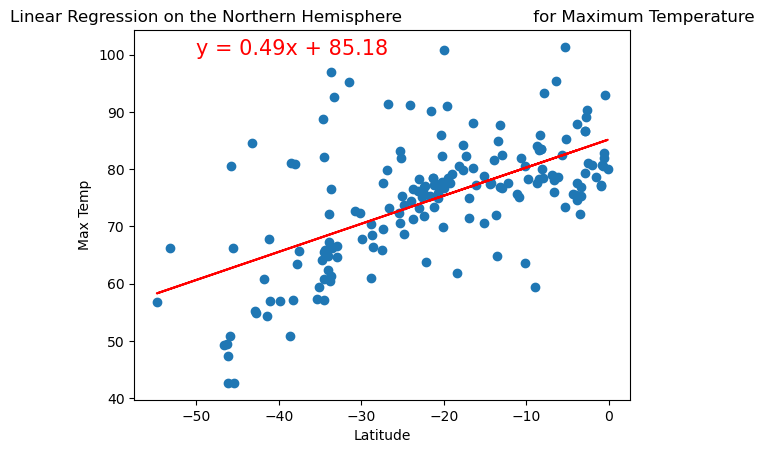

LinregressResult(slope=0.49062167324809036, intercept=85.18232485690805, rvalue=0.6017389878390502, pvalue=1.0267589828321659e-18, stderr=0.04936779431244708, intercept_stderr=1.2323308851619696)

In [84]:
x_values=southern_hemi_df["Lat"]

y_values=southern_hemi_df["Max Temp"]

#call the fuction:

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,100))
linregress(x_values,y_values)

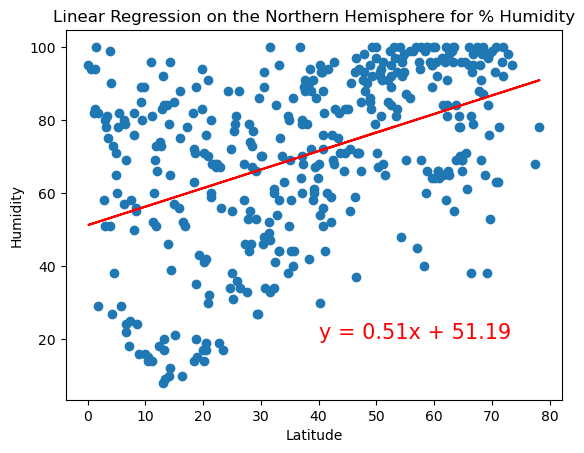

LinregressResult(slope=0.5075246574293324, intercept=51.185660648427564, rvalue=0.4394630889699611, pvalue=5.476198455763273e-20, stderr=0.052462470559298216, intercept_stderr=2.2375841672454935)

In [89]:
#perform linear regression on Percent Humidity for Northern Hemisphere

x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       'Humidity', (40,20))

linregress(x_values,y_values)

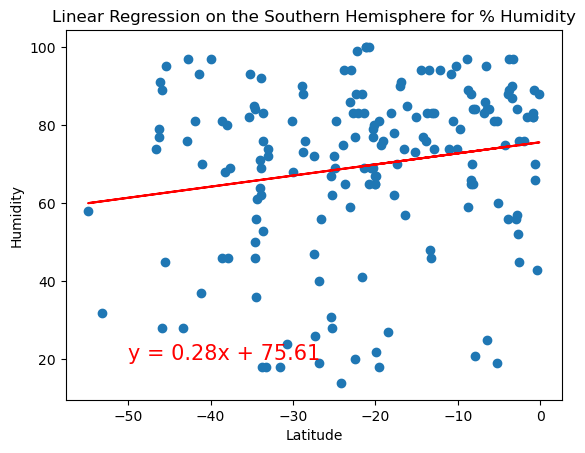

LinregressResult(slope=0.28447632765479003, intercept=75.60642725082397, rvalue=0.17547724539634818, pvalue=0.01983336014838754, stderr=0.12099269115172309, intercept_stderr=3.0202489753028816)

In [94]:
#perform linear regression on Percent Humidity for Southern Hemisphere

x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       'Humidity', (-50,20))

linregress(x_values,y_values)

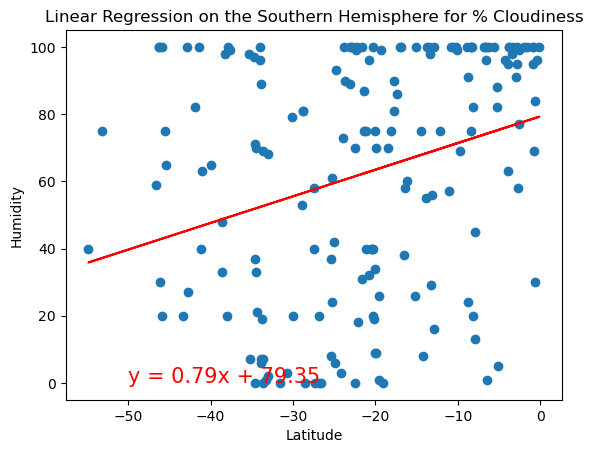

LinregressResult(slope=0.7936727347505248, intercept=79.34545269163742, rvalue=0.2932214182363862, pvalue=7.832439527563853e-05, stderr=0.19617753870411142, intercept_stderr=4.8970314207288865)

In [95]:
#perform linear regression on Percent Cloudiness for Southern Hemisphere

x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       'Humidity', (-50,0))

linregress(x_values,y_values)

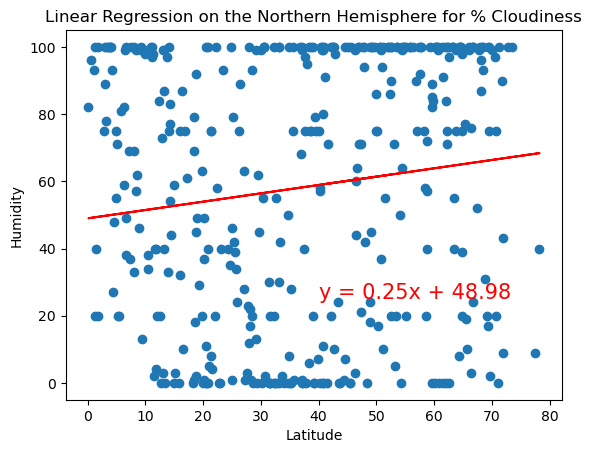

LinregressResult(slope=0.24818077605412162, intercept=48.97801483673613, rvalue=0.1315032133413628, pvalue=0.009054507961630402, stderr=0.09461399883483855, intercept_stderr=4.035394893447242)

In [97]:
#perform linear regression on Percent Cloudiness for Northern Hemisphere

x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       'Humidity', (40,25))

linregress(x_values,y_values)

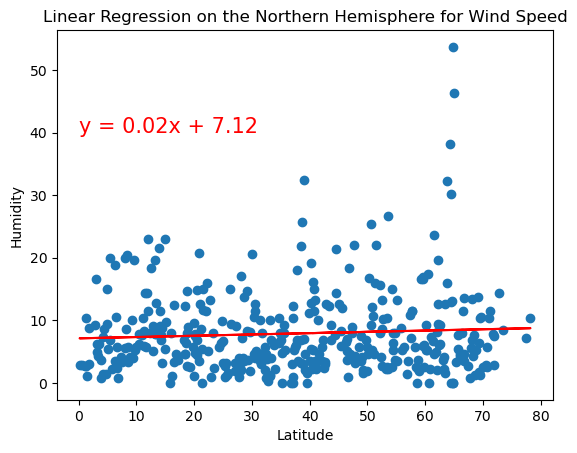

LinregressResult(slope=0.02072736218124459, intercept=7.12380139021369, rvalue=0.06403111830585138, pvalue=0.20528968441516654, stderr=0.01633700493521376, intercept_stderr=0.6967918817686498)

In [100]:
#perform linear regression on Percent Wind Speed for Northern Hemisphere

x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Humidity', (0,40))

linregress(x_values,y_values)

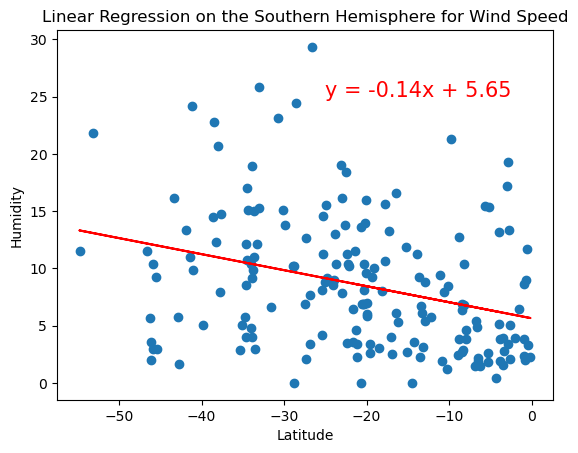

LinregressResult(slope=-0.13998580736576444, intercept=5.648278196077767, rvalue=-0.31623668279255046, pvalue=1.9053119908629665e-05, stderr=0.03183589257329597, intercept_stderr=0.7946952911542082)

In [105]:
#perform linear regression on Percent Wind Speed for Northern Hemisphere

x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Humidity', (-25,25))

linregress(x_values,y_values)